In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
import glob
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
import seaborn as sns
pd.options.mode.chained_assignment = None
style.use('ggplot') or plt.style.use('ggplot')


In [2]:
# Read in anisotropy data (note: this is cross-section at z=0)

df = pd.read_csv('../ModelOutputData/TimeStep05.csv')
df.columns


Index(['pressure', 'dsdt', 'ds', 'fluxinit', 'mesh velocity', 'mesh change',
       'stress 1', 'stress 2', 'stress 3', 'stress 4', 'stress 5', 'stress 6',
       'distance', 'zs', 'zs residual', 'zs accumulation', 'zb', 'zb residual',
       'zb accumulation', 'groundedmask', 'temp', 'temp homologous',
       'temp residual', 'depth', 'd 1', 'd 2', 'd 3', 'd 4', 'd 5', 'd 6',
       'w 1', 'w 2', 'w 3', 'a2 1', 'a2 2', 'a2 3', 'a2 4', 'a2 5', 'a2 6',
       'w', 'vx', 'vy', 'zs0', 'zb0', 'tsurf', 'height', 'smb', 'sea level',
       'normal vector:0', 'normal vector:1', 'normal vector:2', 'fwater:0',
       'fwater:1', 'fwater:2', 'velocity:0', 'velocity:1', 'velocity:2',
       'stress vector:0', 'stress vector:1', 'stress vector:2', 'Points:0',
       'Points:1', 'Points:2'],
      dtype='object')

In [3]:
# Interpolate the unstructured anisotropy data onto a regular grid

xmin, xmax = min(df['Points:0']), max(df['Points:0'])
ymin, ymax = min(df['Points:1']), max(df['Points:1'])
dist = 100
nx, ny = int((xmax - xmin)/dist + 1), int((ymax - ymin)/dist + 1)
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
grid_x, grid_y = np.meshgrid(x, y)

axx = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 1'], (grid_x, grid_y), method='linear')
ayy = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 2'], (grid_x, grid_y), method='linear')
azz = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 3'], (grid_x, grid_y), method='linear')
axy = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 4'], (grid_x, grid_y), method='linear')
axz = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 5'], (grid_x, grid_y), method='linear')
ayz = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 6'], (grid_x, grid_y), method='linear')


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_64186/2989182462.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])


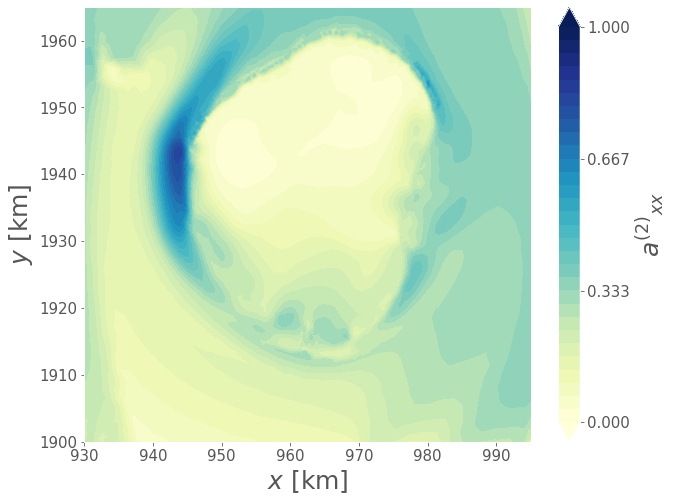

In [4]:
# Plot the x-component (a_xx) of the crystal orientation tensor 

inter = 1
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, axx, levels=np.linspace(0,1,31),  cmap='YlGnBu', extend = 'both')
skip = (slice(None, None, inter), slice(None, None, inter))
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"${a^{(2)}}_{xx}$", rotation=90, size=25)

fig.savefig('../Figures/a_xx.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_64186/1838969895.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])


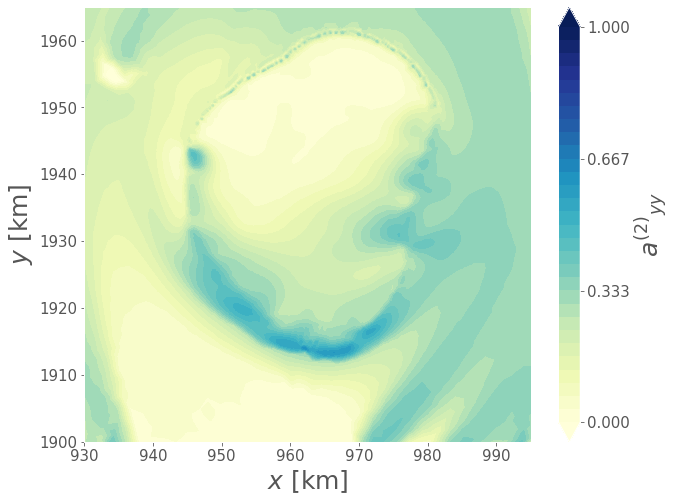

In [5]:
# Plot the y-component (a_yy) of the crystal orientation tensor 

inter = 1
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, ayy, levels=np.linspace(0,1,31),  cmap='YlGnBu', extend = 'both')
skip = (slice(None, None, inter), slice(None, None, inter))
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"${a^{(2)}}_{yy}$", rotation=90, size=25)

fig.savefig('../Figures/a_yy.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_64186/2245916804.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])


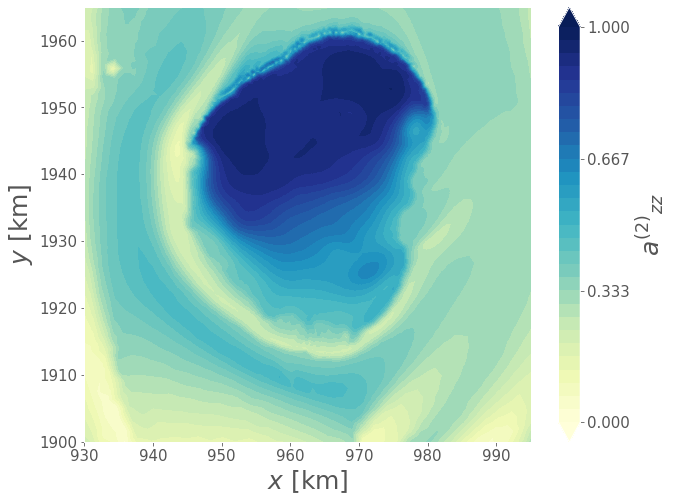

In [6]:
# Plot the vertical (a_zz) crystal orientation tensor 

inter = 1
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, azz, levels=np.linspace(0,1,31),  cmap='YlGnBu', extend = 'both')
skip = (slice(None, None, inter), slice(None, None, inter))
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"${a^{(2)}}_{zz}$", rotation=90, size=25)

fig.savefig('../Figures/a_zz.jpg', format='jpg', dpi=700, bbox_inches = "tight")


In [7]:
# Create an array for the fabric strength

fab_str = np.zeros_like(axx)

for i in range(len(axx)):
    for j in range(len(axx[0])):
        aniso = np.array([[axx[i][j], axy[i][j], axz[i][j]], [axy[i][j], ayy[i][j], ayz[i][j]], [axz[i][j], ayz[i][j], azz[i][j]]])
        det = np.linalg.det(aniso)
        fab_str[i][j] = 1.0 - 27.0 * det
        

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_64186/2435797608.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])


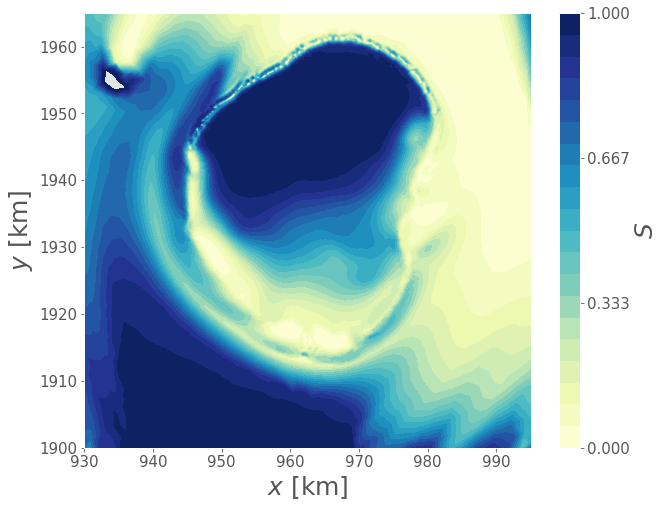

In [26]:
# Plot the fabric strength (s=0 is isotropic, s=1 has a single maximum)

inter = 30
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, fab_str, levels=np.linspace(0,1,21),  cmap='YlGnBu')
skip = (slice(None, None, inter), slice(None, None, inter))
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"$S$", rotation=90, size=25)

fig.savefig('../Figures/fabric_strength.jpg', format='jpg', dpi=700, bbox_inches = "tight")



In [11]:
# Find the eigenvalues and eigenvectors of the 3D anisotropy tensor
# Note: lamda1 < lamda2 < lamda3

lambda1 = np.zeros_like(axx)
lambda2 = np.zeros_like(axx)
lambda3 = np.zeros_like(axx)
ev1x = np.zeros_like(axx)
ev1y = np.zeros_like(axx)
ev1z = np.zeros_like(axx)
ev2x = np.zeros_like(axx)
ev2y = np.zeros_like(axx)
ev2z = np.zeros_like(axx)
ev3x = np.zeros_like(axx)
ev3y = np.zeros_like(axx)
ev3z = np.zeros_like(axx)

for i in range(len(axx)):
    for j in range(len(axx[0])):
        aniso = np.array([[axx[i][j], axy[i][j], axz[i][j]], [axy[i][j], ayy[i][j], ayz[i][j]], [axz[i][j], ayz[i][j], azz[i][j]]])
        v, w = LA.eigh(aniso)
        lambda1[i][j], lambda2[i][j], lambda3[i][j] = v[0], v[1], v[2]
        ev1x[i][j], ev1y[i][j], ev1z[i][j] = w[0][0], w[0][1], w[0][2]
        ev2x[i][j], ev2y[i][j], ev2z[i][j] = w[0][0], w[0][1], w[0][2]
        ev3x[i][j], ev3y[i][j], ev3z[i][j] = w[0][0], w[0][1], w[0][2]


In [19]:
# Calculate the Woodcock k number

k = np.zeros_like(axx)

for i in range(len(axx)):
    for j in range(len(axx[0])):
        k[i][j] = np.log(lambda3[i][j]/lambda2[i][j]) / np.log(lambda2[i][j]/lambda1[i][j])


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_64186/3369537652.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  k[i][j] = np.log(lambda3[i][j]/lambda2[i][j]) / np.log(lambda2[i][j]/lambda1[i][j])
/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_64186/3369537652.py:7: RuntimeWarning: invalid value encountered in double_scalars
  k[i][j] = np.log(lambda3[i][j]/lambda2[i][j]) / np.log(lambda2[i][j]/lambda1[i][j])
/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_64186/3369537652.py:7: RuntimeWarning: invalid value encountered in log
  k[i][j] = np.log(lambda3[i][j]/lambda2[i][j]) / np.log(lambda2[i][j]/lambda1[i][j])


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_64186/2789721698.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0.0, 1.0, 2.0])


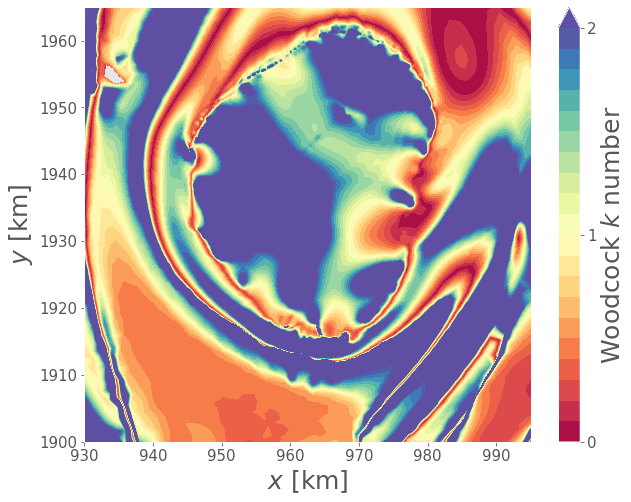

In [29]:
# Plot the Woodcock k number

inter = 1
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, k, levels=np.linspace(0,2,21),  cmap='Spectral', extend = 'max')
skip = (slice(None, None, inter), slice(None, None, inter))
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0.0, 1.0, 2.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"Woodcock $k$ number", rotation=90, size=25)

fig.savefig('../Figures/woodcock_k.jpg', format='jpg', dpi=700, bbox_inches = "tight")
